In [292]:
## imports ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score



import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from typing import Dict, Any, List, Tuple
from sklearn.base import clone


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

## Data Analysis

In [293]:
import warnings
warnings.filterwarnings("ignore")

#load the energy dataset
data = pd.read_csv("/Users/sanchana/Downloads/incident_event_log.csv")
data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [295]:
# Replacing ? with na values
data = data.replace('?', np.nan)

# sum of na values
data.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [296]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  141712
The number of columns in dataset is -  36


##  Data Preprocessing 

### Columns to drop 
1. problem_id
2. rfc
3. vendor
4. caused_by
5. cmdb_ci
6. impact
7. urgency
8. notify
9. resolved at

In [297]:
data.duplicated().sum()

0

In [298]:
# Droppping above column from column list 
data = data.drop(['problem_id','rfc','vendor', 'caused_by','cmdb_ci',  'resolved_at', 'impact', 'urgency', 'notify'], axis = 1)

In [299]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,Subcategory 215,Symptom 471,3 - Moderate,Group 70,Resolver 89,True,False,code 5,Resolved by 81,6/3/2016 10:00


In [300]:
# Drop na values 
data = data.dropna()

In [301]:
# Showing sum of na values 
data.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
closed_code                0
resolved_by                0
closed_at                  0
dtype: int64

In [302]:
incident = data

In [303]:
# Extracted numeric value from these columns
extract_numerics = ['caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'category', 'subcategory','u_symptom', 'priority', 'assignment_group', 'assigned_to','closed_code', 'resolved_by','number' ]
for feature in extract_numerics:
    incident[feature] = incident[feature].str.extract('(\d+)')

## Encoding

In [304]:
#Performed Label Encoding
objList = ['incident_state', 'active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation']
for feature in objList:
    incident[feature] = le.fit_transform(incident[feature])

In [305]:
incident[['opened_at','closed_at']] = incident[['opened_at','closed_at']].apply(pd.to_datetime, format='%d/%m/%Y %H:%M')

### Computing completion time days column from opened date and closed date 

In [306]:
incident['completion_time_days'] = incident['closed_at'] - incident['opened_at']
incident['completion_time_days'] = incident['completion_time_days']/ np.timedelta64(1,'D')

In [307]:
# Opened at 
incident['open_month'] = incident.opened_at.dt.month
incident['open_year'] = incident.opened_at.dt.year
incident['open_day'] = incident.opened_at.dt.day
incident['open_week_day'] = incident.opened_at.dt.weekday

# Closed at
incident['closed_month'] = incident.closed_at.dt.month
incident['closed_year'] = incident.closed_at.dt.year
incident['closed_day'] = incident.closed_at.dt.day
incident['closed_week_day'] = incident.closed_at.dt.weekday

In [308]:
incident_data = incident[['category','subcategory', 'priority','caller_id','made_sla','open_month', 'open_week_day','closed_month','closed_week_day', 'completion_time_days']]


numeric_list = [ 'category','subcategory', 'priority','caller_id','made_sla', 'completion_time_days'] 
for feature in numeric_list:
    incident_data[feature] = pd.to_numeric(incident_data[feature])

In [309]:
incident_data.head()

,category,subcategory,priority,caller_id,made_sla,open_month,open_week_day,closed_month,closed_week_day,completion_time_days
4,40,215,3,2403,1,2,0,3,6,6.222222
5,40,215,3,2403,1,2,0,3,6,6.222222
6,40,215,3,2403,1,2,0,3,6,6.222222
7,40,215,3,2403,1,2,0,3,6,6.222222
8,40,215,3,2403,1,2,0,3,6,6.222222


## Scaling Data

In [310]:
sc = StandardScaler()

In [311]:
data_std = sc.fit_transform(incident_data)
incident_data = pd.DataFrame(data_std, columns= incident_data.columns)
incident_data.head()

,category,subcategory,priority,caller_id,made_sla,open_month,open_week_day,closed_month,closed_week_day,completion_time_days
0,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535,-0.414585
1,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535,-0.414585
2,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535,-0.414585
3,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535,-0.414585
4,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535,-0.414585


In [312]:
y = incident_data['completion_time_days']
X = incident_data.drop(['completion_time_days'], axis = 1)

In [313]:
X.head()

,category,subcategory,priority,caller_id,made_sla,open_month,open_week_day,closed_month,closed_week_day
0,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535
1,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535
2,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535
3,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535
4,0.259884,0.720008,0.071566,-0.215299,0.27187,-1.837116,-1.257215,-1.014223,1.411535


## Lasso Rregression

### Splitting Data

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [122]:
lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(X_train.values, y_train.values) 
print("Lasso model cofficients :",lassoModel.coef_)

y_pred_ltrain = lassoModel.predict(X_train.values)
print("-------------------------------------------------------")
print('Lasso Regression - Train')
print('Lasso Regression - Mean Squared error:', round(mean_squared_error(y_train,y_pred_ltrain),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_train,y_pred_ltrain),4))


y_pred_ltest = lassoModel.predict(X_test.values)
print("-------------------------------------------------------")
print('Lasso Regression - Test')
print('Lasso Regression - Mean Squared error:', round(mean_squared_error(y_test, y_pred_ltest),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_test, y_pred_ltest),4))

Lasso model cofficients : [ 1.04895156e-04  9.57733596e-04 -1.69593821e-03  3.82390136e-04
  1.33236582e-03 -2.06221934e-04 -4.72554905e-01  1.22567504e-03
  8.60815576e-01 -3.35286786e-04]
-------------------------------------------------------
Lasso Regression - Train
Lasso Regression - Mean Squared error: 0.3649
Lasso Regression - R-Squared: 0.638
-------------------------------------------------------
Lasso Regression - Test
Lasso Regression - Mean Squared error: 0.3753
Lasso Regression - R-Squared: 0.612


### Feature importance for Lasso regression

In [123]:
lassoImportantfeatures = pd.DataFrame(data={'feature': X.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

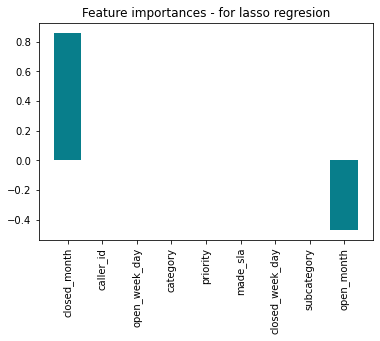

In [124]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()